# Build Regression Model based on data_per_zipcode

As seen during our collinearity analysis it seems that zipcode might affect
the property price.


# Build Regression Model based on data_per_zipcode to predict property price

As seen during our collinearity analysis it seems that zipcode might affect
the property price.

So the question is How does that work ?.

Table of Contents
1. [EDA dataset per zipcode](#EDA-dataset-per-zipcode)
4. [Scale and normalise variables](#Scale-and-normalise-variables)
5. [Building the model](#Building-the-model)
6. [Conclusion](#Conclusion)


# Prep-work


In [1]:
# Import useful librairies and set auto reload
import pandas as pd
import numpy as np
import housing_data as hd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from statsmodels.formula.api import ols

%load_ext autoreload
%autoreload 2



##EDA dataset per zipcode


In [2]:
# Load dataset
data = hd.load_housing_data(with_cat_columns=False)
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,False,0.0,...,7,1180,0.0,1955-01-01,1955-01-01,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,False,0.0,...,7,2170,400.0,1951-01-01,1991-01-01,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,False,0.0,...,6,770,0.0,1933-01-01,1933-01-01,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,False,0.0,...,7,1050,910.0,1965-01-01,1965-01-01,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,False,0.0,...,8,1680,0.0,1987-01-01,1987-01-01,98074,47.6168,-122.045,1800,7503


/Users/flatironstudentaccount/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


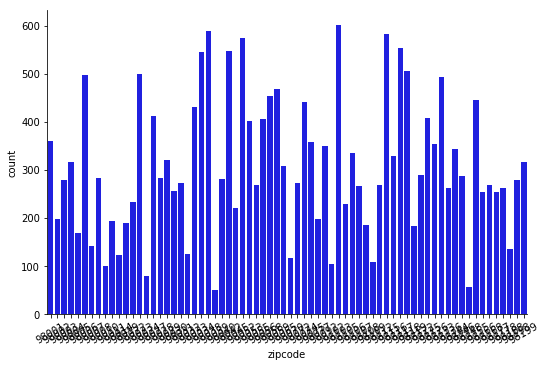

In [3]:
# Plot property count per zipcode
g = sns.factorplot("zipcode", data=data, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=30)


It looks like we got enough data per zipcode.


**Display price against sqft_living**


In [4]:
# Split dataset in two group of zipcode for display purpose.
zipcodes = data['zipcode'].unique()
zipcodes.sort()
zipcodes_median = zipcodes[(len(zipcodes) // 2): (len(zipcodes) // 2) + 1][0]

data_set1 = data.loc[data['zipcode'] <= zipcodes_median]
data_set2 = data.loc[data['zipcode'] > zipcodes_median]


<Figure size 720x720 with 0 Axes>

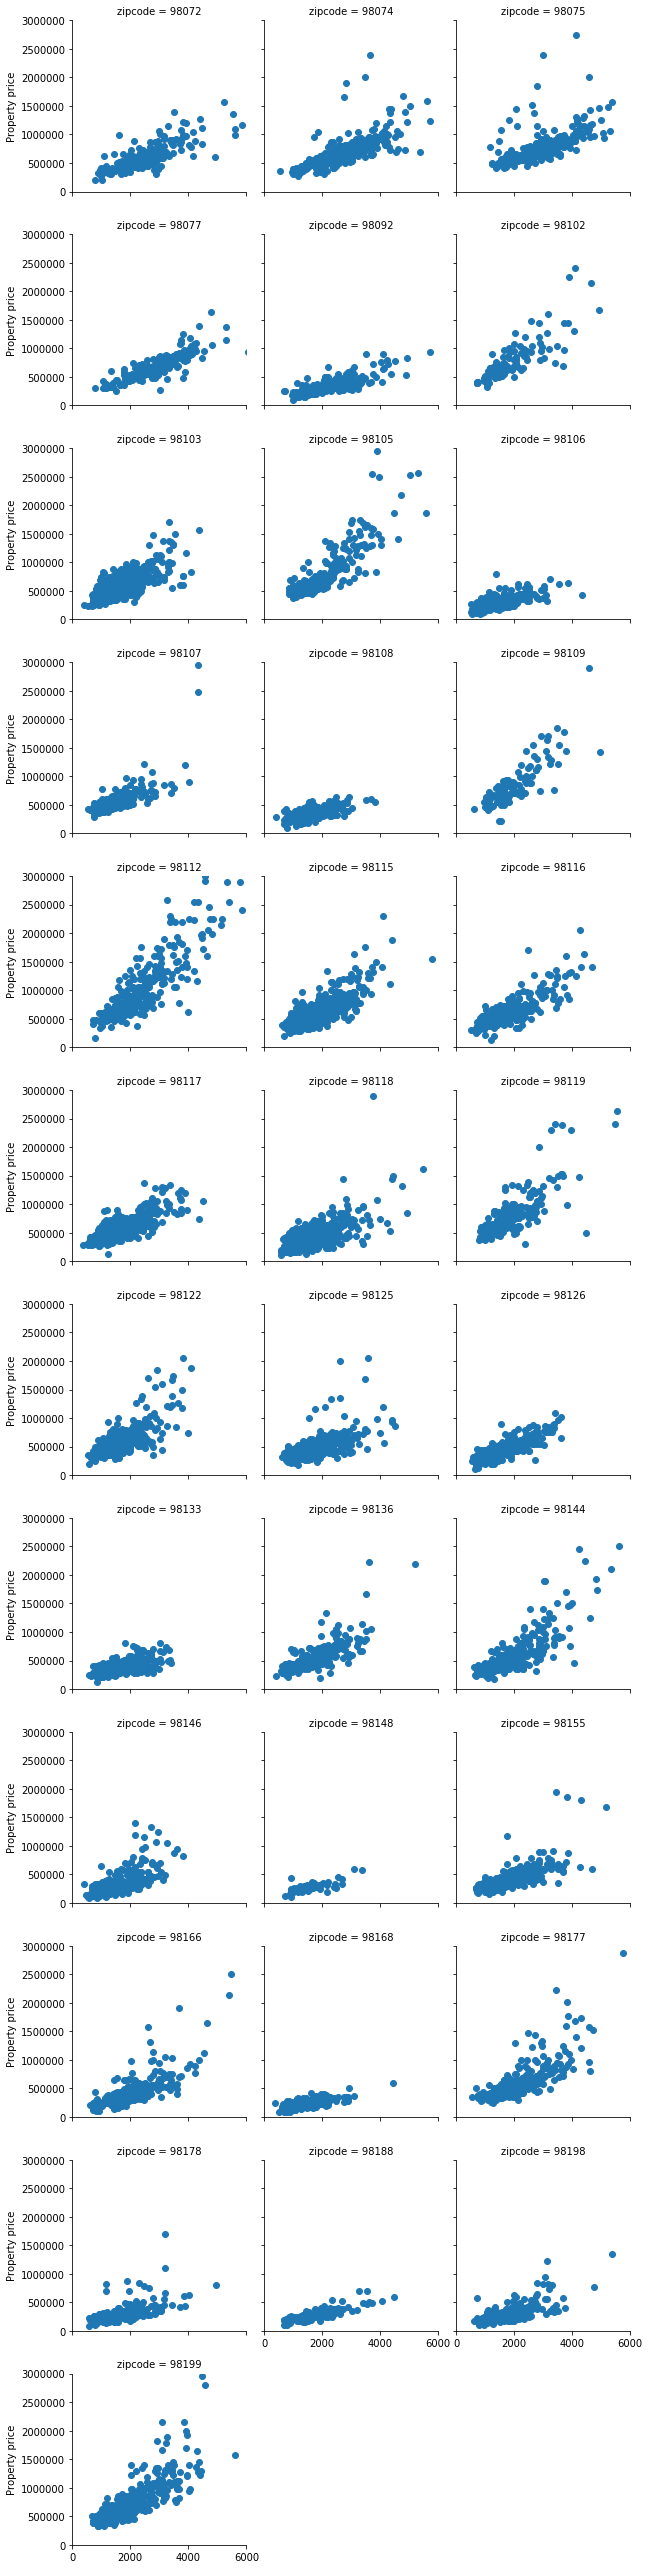

In [5]:
# Display price vs sqft_living on the first subset
plt.figure(figsize=(10,10))
g = sns.FacetGrid(data_set2, col="zipcode", col_wrap=3)
g.map(plt.scatter, "sqft_living", "price")
g.set(xlim=(0, 6000), ylim=(0, 3000000))
g.set_xlabels('')
g.set_ylabels('Property price')


**Conclusion** : The plots seem to be linear. Let's validate this hypothesis
by building a model on a specific zipcode.


## Scale and normalise variables


In [6]:
# Scale Variables data
log_sqft_living = np.log(data['sqft_living'])
scaled_sqft_living = (log_sqft_living-min(log_sqft_living))/(max(log_sqft_living)-min(log_sqft_living))

data_fin = pd.DataFrame([])
data_fin['sqft_living'] = scaled_sqft_living

scaled_data = data.drop(['sqft_living'], axis=1)
scaled_data = pd.concat([scaled_data, data_fin], axis=1)


# Building the model
We are now going to try to run a simple Regression against our dataset


In [9]:
# Get sample data from specific zipcode
zipcode = 98072
data_per_zipcode = scaled_data.loc[scaled_data['zipcode'] == zipcode]


In [8]:
# Build formula
# Notes that we are especting a corrolation between sqft_living and price_sqft
formula = 'price ~ sqft_living'


In [10]:
# Run simple prediction
model = ols(formula=formula, data=data_per_zipcode).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     380.3
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.59e-53
Time:                        16:17:35   Log-Likelihood:                -3621.7
No. Observations:                 273   AIC:                             7247.
Df Residuals:                     271   BIC:                             7255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.444e+05   4.26e+04     -5.734      0.000   -3.28e+05    -1.6e+05
sqft_living  1.636e+06   8.39e+04     19.501      0.000    1.47e+06     1.8e+06
==============================================================================
Omnibus:                       77.482   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.083
Skew:                           1.262   Prob(JB):                     1.62e-48
Kurtosis:                       6.603   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations** : The Adj. R-squared is pretty low and our variables coef
p-values are low. This doesn't look good.


# Conclusion
We saw that the model built based on zipcode proximity is not really accurate
We need to come up with a more precise model.